<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Изучение-пропусков" data-toc-modified-id="Изучение-пропусков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изучение пропусков</a></span></li><li><span><a href="#Изучение-дубликатов" data-toc-modified-id="Изучение-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изучение дубликатов</a></span></li><li><span><a href="#Поиск-аномалий" data-toc-modified-id="Поиск-аномалий-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Поиск аномалий</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Подготовка-данных-для-обучения-и-выбор-метрики" data-toc-modified-id="Подготовка-данных-для-обучения-и-выбор-метрики-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка данных для обучения и выбор метрики</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обучение модели</a></span><ul class="toc-item"><li><span><a href="#Обучение-алгоритма-опорных-векторов-(SVM)" data-toc-modified-id="Обучение-алгоритма-опорных-векторов-(SVM)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Обучение алгоритма опорных векторов (SVM)</a></span></li><li><span><a href="#Нейросетевой-подход" data-toc-modified-id="Нейросетевой-подход-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Нейросетевой подход</a></span></li></ul></li><li><span><a href="#Отчет-о-проделанной-работе" data-toc-modified-id="Отчет-о-проделанной-работе-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Отчет о проделанной работе</a></span><ul class="toc-item"><li><span><a href="#Этапы-выполнения" data-toc-modified-id="Этапы-выполнения-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Этапы выполнения</a></span></li><li><span><a href="#Анализ-признаков" data-toc-modified-id="Анализ-признаков-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Анализ признаков</a></span></li><li><span><a href="#Использование-модели" data-toc-modified-id="Использование-модели-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Использование модели</a></span></li></ul></li></ul></div>

# Анализ отзывов на банки

**Цель работы**

В ходе данной работы необходимо провести EDA и ответить на поставленные вопросы. 
Во второй части работы необходимо создание модели, которая будет классифицировать отзывы на положительные и отрицательные.

**Предоставленные данные**

В нашем распоряжении имеется следующий набор данных взятых с сайта [banki.ru](https://www.banki.ru/): 
- body - сам отзыв
- title - название отзыва
- rating - оценка по отзыву, варьируется от 1 до 5
- bank_name - название банка
- date - дата публикации отзыва


**План работы**

1. **Загрузка и изучение данных.** Предварительно загружаем данные и изучаем их (объем данных, типы данных)


2. **Предобработка данных.** При необходимости обработка пропущенных значений, изменение типов данных, поиск и удаление дубликатов и аномалий. 


3. **Исследовательский анализ данных.** Глубокое изучение данных, поиск зависимостей, ответы на поставленные вопросы, визуализация.


4. **Подготовка данных для обучения.** Предобработка текстовых данных в понятный для предсказания вид, генерация новых признаков, удаление неинформативных признаков, выбор метрики. 


5. **Обучение модели.** Обучение модели на подготовленных данных и визуализация результатов работы.


6. **Отчет о проделанной работе.**

## Загрузка и изучение данных

In [1]:
# Импорт необходимых библиотек
import re
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import nltk
from nltk.tokenize import word_tokenize
import pymorphy2
from gensim.models import Word2Vec
from html import unescape

from sklearn.model_selection import (
    GridSearchCV, cross_val_score, StratifiedKFold, train_test_split
)
from sklearn.svm import SVC
from sklearn.metrics import (
    f1_score, accuracy_score, confusion_matrix, 
    classification_report, roc_auc_score, roc_curve
)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary

D:\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
tqdm.pandas()
warnings.filterwarnings('ignore')

In [3]:
# Загрузка данных
data = pd.read_csv('parsed_reviews3.csv')

In [4]:
# Вывод основной информации о таблице
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92735 entries, 0 to 92734
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   body       92735 non-null  object
 1   title      92735 non-null  object
 2   rating     92735 non-null  int64 
 3   bank_name  92735 non-null  object
 4   date       92735 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.5+ MB


,body,title,rating,bank_name,date
0,&lt;p&gt;Добрый день&lt;/p&gt;\r\n&lt;p&gt;пиш...,Заблокировали средства,1,Еком Банк,2023-01-03 12:46:11
1,&lt;p&gt;При возврате просроченной задолженнос...,Возврат просроченной задолженномти,1,Тинькофф Банк,2023-01-03 12:31:46
2,&lt;p&gt;07.09.22 ю была оформлена кредитная к...,"Ошибочное начисление комиссии, затягивание про...",1,Банк Открытие,2023-01-03 12:23:11
3,&lt;p&gt;Новый год начинается с приятностей)&l...,Клиентоориентиванность 10 из 10,5,Тинькофф Банк,2023-01-03 12:16:07
4,&lt;p&gt;Увидела на сайте Газпромбанка акцию с...,Как Газпромбанк обманывает клиентов с акционны...,1,Газпромбанк,2023-01-03 12:12:36
5,"&lt;p&gt;Суперудобный банк, нет комиссии за пе...",Отличный банк для ИПшников,5,Точка,2023-01-03 12:08:35
6,&lt;p&gt;Самый худший банк в стране!!! Сотрудн...,Мошенники,1,ВТБ,2023-01-03 12:04:02
7,&lt;p&gt;Добрый день. &lt;/p&gt;\r\n&lt;p&gt;В...,Звонки!,1,Почта Банк,2023-01-03 11:59:04
8,&lt;p&gt;Мне очень понравился тинькофф и как о...,Хороший банк,5,Тинькофф Банк,2023-01-03 11:58:32
9,"&lt;p&gt;В декабре уже было написано, что 512 ...",Глюченный банк,1,Хоум Кредит Банк,2023-01-03 11:47:17


**Вывод по пункту 1.** По предварительному анализу данных были сделаны выводы:

1. В данных имеется 5 столбцов, из которых 4 имеют тип данных `object` и 1 имеет тип данных `int64`.
2. В каждом столбце нашей таблицы имеется 92735 non-null значений, что может говорить об отсутствии пропусков в данных.

Так же стоит отметить, что тип данных в столбце `date` стоит изменить для более удобного анализа.

## Предобработка данных

### Изменение типов данных

Для дальнейшего извлечения необходимых частей даты и корректной визуализации данных изменим тип данных в столбце `date` на `datetime64`. Так же уберем время публикации отзыва, поскольку для дальнейшего анализа оно не имеет значения.

In [5]:
# Изменение типа данных в столбце 'date'
data['date'] = pd.to_datetime(data.date, errors='coerce')
data['date'] = data['date'].dt.date
data['date'] = pd.to_datetime(data.date, format='%Y-%m-%d', errors='coerce')

In [6]:
data.info()
data.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92735 entries, 0 to 92734
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   body       92735 non-null  object        
 1   title      92735 non-null  object        
 2   rating     92735 non-null  int64         
 3   bank_name  92735 non-null  object        
 4   date       92735 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 3.5+ MB


,body,title,rating,bank_name,date
0,&lt;p&gt;Добрый день&lt;/p&gt;\r\n&lt;p&gt;пиш...,Заблокировали средства,1,Еком Банк,2023-01-03
1,&lt;p&gt;При возврате просроченной задолженнос...,Возврат просроченной задолженномти,1,Тинькофф Банк,2023-01-03


### Изучение пропусков

Проверим наличие пропусков и дубликатов в наших данных

In [7]:
# Таблица с процентами пропусков для каждого поля
pd.DataFrame(data.isna().mean()*100).style.format('{:.1f}%').background_gradient('Greens')

,0
body,0.0%
title,0.0%
rating,0.0%
bank_name,0.0%
date,0.0%


**Вывод:** По полученной таблице видно, что пропуски в данных отсутствуют.

### Изучение дубликатов

In [8]:
count_of_miss = data.duplicated().sum()
print(f'Количество дубликатов в таблице равно {count_of_miss}')

Количество дубликатов в таблице равно 254


Посмотрим в какой промежуток времени возникли дубликаты. Это может помочь точнее установить причину их возникновения.

In [9]:
# Переменная, хранящая задвоенные строки
data_duplicated = data.loc[data.duplicated() == True]
data_duplicated.head()

,body,title,rating,bank_name,date
305,&lt;p&gt;Здравствуйте🙂Хочу поблагодарить Совко...,Быстрое решение моего вопроса по кредиту плюс ...,5,Совкомбанк,2023-01-01
306,&lt;p&gt;Здравствуйте🙂Хочу поблагодарить Совко...,Быстрое решение моего вопроса по кредиту плюс ...,5,Совкомбанк,2023-01-01
899,&lt;p&gt;Обратился 3 декабря в районе 19 часов...,открытие счёта и получение банковской карты,5,Хоум Кредит Банк,2022-12-30
997,&lt;p&gt;С самого открытия являемся клиентами ...,"Сняли деньги за перевод физ.лицу, а услугу не ...",1,Норвик Банк,2022-12-30
1611,&lt;p&gt;22.12.2022 в чате своего ЛК мобильног...,Отсутствие информации о порядке конвертации ва...,2,Росбанк,2022-12-29


In [10]:
# Банки с наибольшим числом дубликатов
data_grouped_bank = ( 
    data_duplicated.groupby(by='bank_name')
    .agg({'date': 'count', 'rating': 'mean'})
    .rename(columns=({'date': 'count', 'rating': 'mean_rating'}))
    .reset_index()
)
print('Таблица 1 - Банки с наибольшим числом дубликатов')
data_grouped_bank.sort_values(by='count', ascending=False).head()

Таблица 1 - Банки с наибольшим числом дубликатов


,bank_name,count,mean_rating
16,Тинькофф Банк,172,4.906977
18,Хоум Кредит Банк,22,4.409091
15,Совкомбанк,19,4.789474
7,Модульбанк,9,5.000000
12,Россельхозбанк,5,5.000000


Таблица 2 - Даты с наибольшим количеством дубликатов


,date,count,mean_rating
4,2022-10-28,75,4.933333
30,2022-12-23,38,3.894737
5,2022-10-29,35,4.942857
34,2022-12-28,17,3.823529
3,2022-10-27,12,5.000000


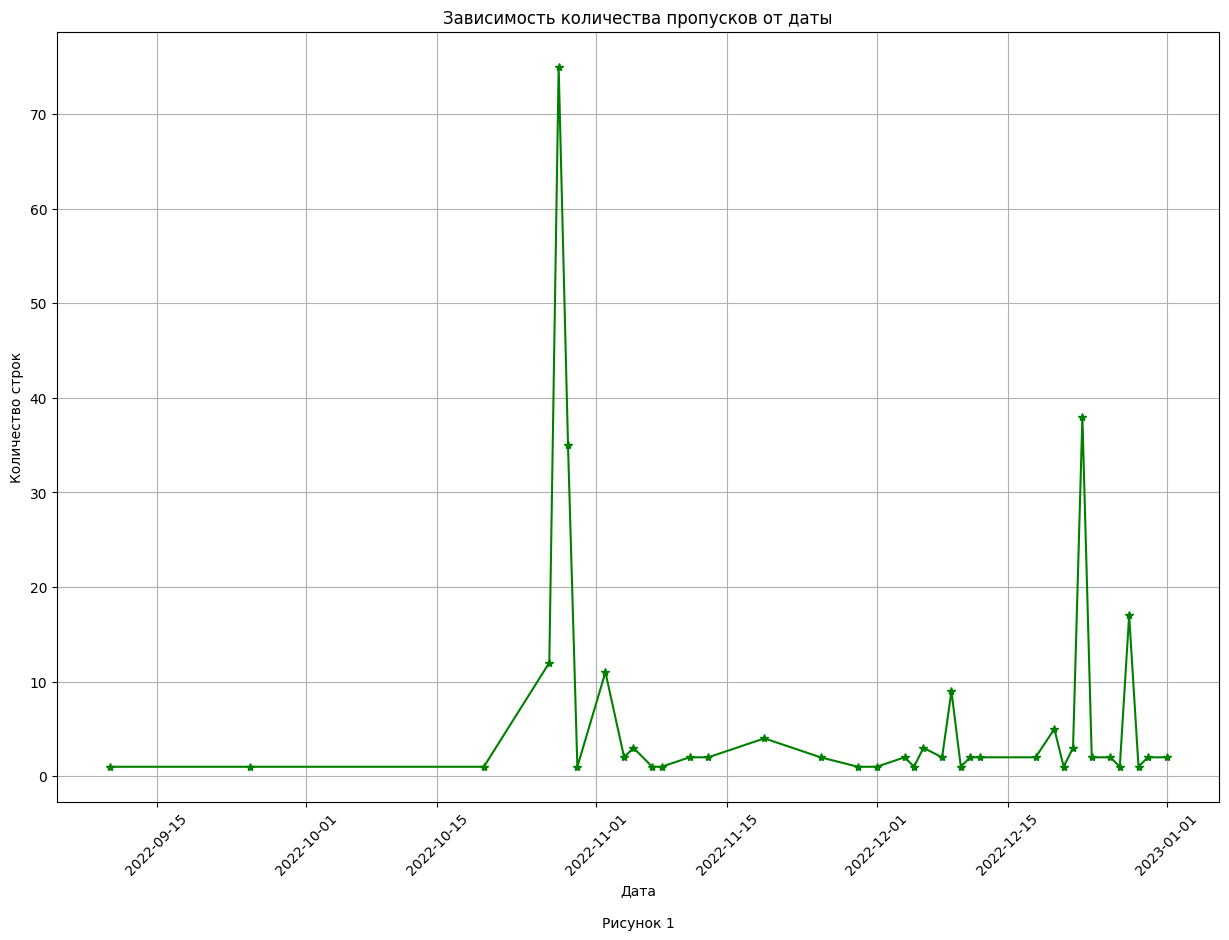

In [11]:
# Подсчет кол-ва строк для каждой даты
data_grouped = ( 
    data_duplicated.groupby(by='date')
    .agg({'date': 'count', 'rating': 'mean'})
    .rename(columns=({'date': 'count', 'rating': 'mean_rating'}))
    .reset_index()
)

# Сводка по самым большим кол-вам дубликатов
print('Таблица 2 - Даты с наибольшим количеством дубликатов')
display(data_grouped.sort_values(by='count', ascending=False).head())

# Построение зависимости кол-ва пропусков от даты
plt.figure(figsize=(15, 10))
plt.plot(data_grouped['date'], data_grouped['count'], marker='*', color='green')
plt.title('Зависимость количества пропусков от даты')
plt.xlabel('Дата\n\nРисунок 1')
plt.ylabel('Количество строк')
plt.xticks(rotation=45)
plt.grid()

Для дальнейшего анализа и обучения модели было принято решение удалить дубликаты. 

In [12]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92481 entries, 0 to 92734
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   body       92481 non-null  object        
 1   title      92481 non-null  object        
 2   rating     92481 non-null  int64         
 3   bank_name  92481 non-null  object        
 4   date       92481 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 4.2+ MB


**Вывод:** Из рисунка 1 видно, что дубликаты возникают не равномерно, а имеют характер всплесков в определенные моменты времени, что может указывать на целенаправленное их создание с целью повышения средней оценки банка. Это также подтверждается таблицей 2, где высокое количество дубликатов сопровождается высокой средней оценкой. 

Стоит отметить, что распределение количества дубликатов для различных банков неоднородно. Например, "Тинькофф Банк" выделяется на фоне других банков. Это может быть связано как с его популярностью, так и с намеренным увеличением средней оценки.

Для более объективного анализа и последующего обучения модели было принято удалить явные дубликаты. В результате чего объем наших данных сократился на 0.27 процента относительно исходного количества строк. 

### Поиск аномалий

Для поиска аномалий в поле `rating` воспользуемся статистичекским описанием данных с помощью метода `describe()`

In [13]:
data.describe()

,rating,date
count,92481.000000,92481
mean,4.062726,2022-11-11 09:45:49.135497984
min,1.000000,2022-09-02 00:00:00
25%,4.000000,2022-10-27 00:00:00
50%,5.000000,2022-11-08 00:00:00
75%,5.000000,2022-12-07 00:00:00
max,5.000000,2023-01-03 00:00:00
std,1.621557,NaN


**Вывод:** Из представленной таблицы видно, что в наших данных отсутствуют аномалии, поскольку оценки находятся в диапазоне от минимального значения 1 до максимального значения 5. Кроме того, мы можем утверждать, что все оценки представлены целыми числами, так как хранятся с типом данных `int64`.

**Вывод по пункту 2.** 


- В реузльтате выполнения пункта 2 мы убедились, что в нашем наборе данных отсутствуют пропуски и аномалии. 


- Изменили тип данных в столбце `date` на наиболее подходящий для дальнейшего анализа


- Обнаружили 254 дубликата в нашем наборе данных, изучили их и приняли решение об их удалении, сократив объем нашей выбрки на 0.27 процентов относительно общего объема данных. 

## Исследовательский анализ данных

На данном этапе работы мы проведем исследовательский анализ для более глубокого изучения даннных. Так же ответим на поставленные вопросы и проведем дополнительный EDA.

**1. Назвать топ-15 банков по числу отзывов.**

**2. Какой банк из числа топ-15 по количеству отзывов имеет самый высокий средний рейтинг?**

Для начала сгруппируем банки по кол-ву отзывов и средней оценки.

In [14]:
# Сгруппируем банки по кол-ву отзывов и среднему рейтингу
top_15_bank = (
    data.groupby(by='bank_name').agg({'body' : 'count', 'rating' : 'mean'})
    .rename(columns={'body': 'count', 'rating': 'mean_rating'})
    .reset_index()
)

In [15]:
top_15_bank = top_15_bank.nlargest(15, 'count')
top_15_bank = top_15_bank.reset_index(drop=True)
top_15_bank

,bank_name,count,mean_rating
0,Тинькофф Банк,44692,4.783093
1,Хоум Кредит Банк,9288,4.505814
2,Совкомбанк,6092,4.263132
3,ВТБ,3812,1.950420
4,СберБанк,3486,2.305221
5,Альфа-Банк,3368,1.714371
6,Россельхозбанк,3059,4.455051
7,Банк Открытие,1894,3.543295
8,МТС Банк,1542,2.901427
9,Модульбанк,1451,4.778773


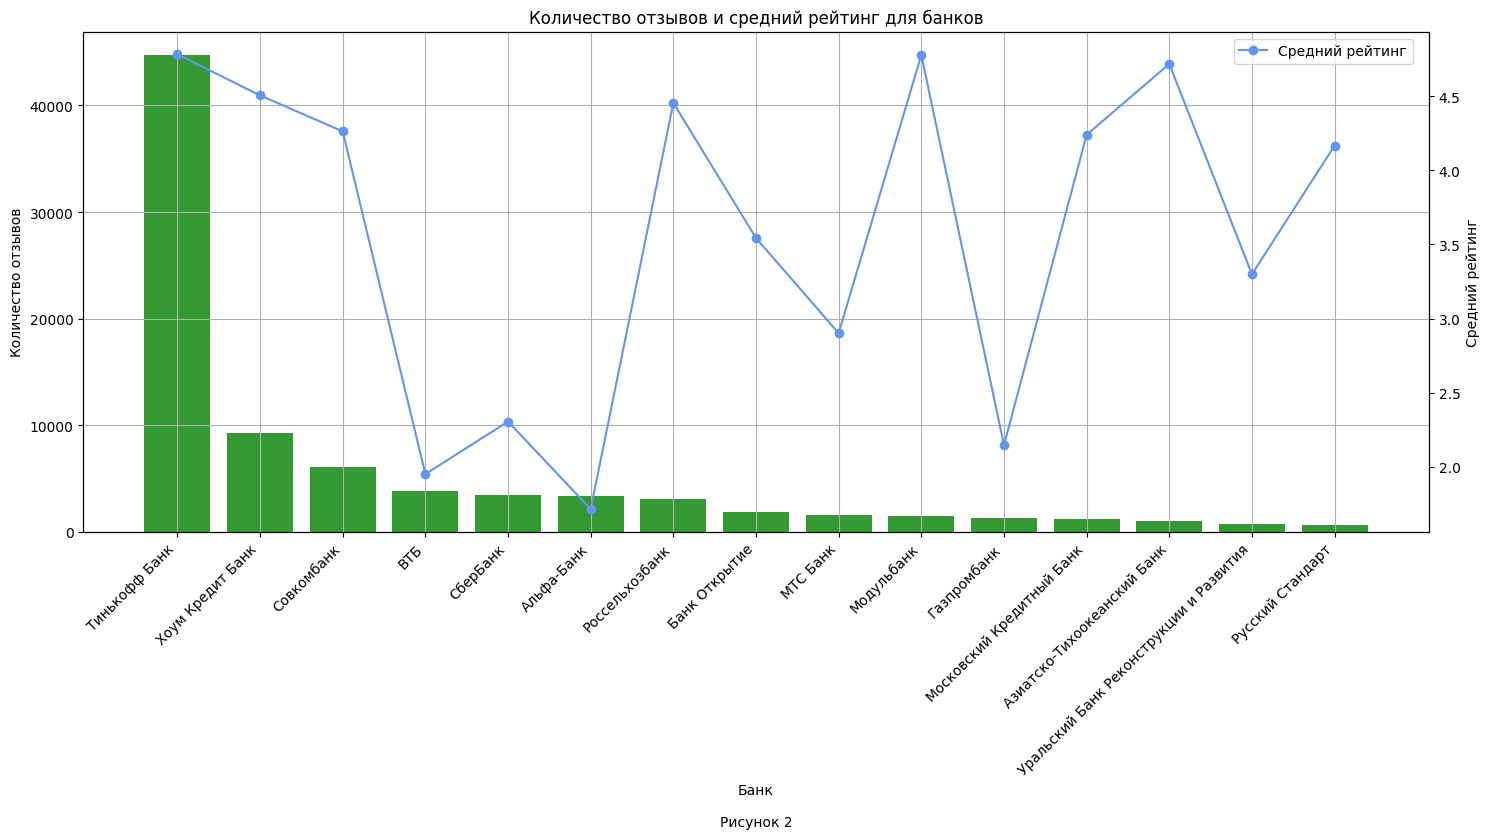

In [16]:
fig, ax1 = plt.subplots(figsize=(15, 8.5))
# Построение столбчатого графика
ax1.bar(top_15_bank['bank_name'], top_15_bank['count'], color='green', alpha=0.8, label='Количество отзывов')
ax1.set_xlabel('Банк\n\nРисунок 2')
ax1.set_ylabel('Количество отзывов')
ax1.set_xticklabels(top_15_bank['bank_name'], rotation=45, ha='right')
plt.grid()

# Построение графика средней оценки
ax2 = ax1.twinx()
ax2.plot(top_15_bank['bank_name'], top_15_bank['mean_rating'], color='cornflowerblue', marker='o', label='Средний рейтинг')
ax2.set_ylabel('Средний рейтинг')


plt.title('Количество отзывов и средний рейтинг для банков')
fig.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(0.85, 1))

In [17]:
top_15_banks_list = '\n'.join(top_15_bank['bank_name'])
print(f'Топ-15 банков по количеству отзывов:\n\n{top_15_banks_list}\n')

max_rating_bank = top_15_bank.loc[top_15_bank['mean_rating'].idxmax(), 'bank_name']
print(f'Самый высокий средний рейтинг имеет {max_rating_bank}')

Топ-15 банков по количеству отзывов:

Тинькофф Банк
Хоум Кредит Банк
Совкомбанк
ВТБ
СберБанк
Альфа-Банк
Россельхозбанк
Банк Открытие
МТС Банк
Модульбанк
Газпромбанк
Московский Кредитный Банк
Азиатско-Тихоокеанский Банк
Уральский Банк Реконструкции и Развития
Русский Стандарт

Самый высокий средний рейтинг имеет Тинькофф Банк


**Вывод:** Из графика, представленного на рисунке 2, заметно, что среди топ-15 банков по количеству отзывов Тинькофф Банк выделяется особенно сильно, имея 44692 отзыва. Что почти в 4,8 раза превышает количество отзывов у банка, занимающего второе место - Хоум Кредит Банка. Также следует отметить, что Тинькофф Банк обладает наивысшим средним рейтингом среди представленных банков (4,783). Однако, также присутствуют банки, с близкими к Тинькофф рейтингами, такие как Модуль Банк (4,779) и Азиатсков-Тихоокеанский Банк (4,718).

**3. Сделать выводы об изменении среднего рейтинга банков по месяцам из топ-5 банков по числу отзывов.**

In [18]:
# Создание таблицы со средним рейтингом топ-5 банков по числу отзывов
top_5_bank_index = data['bank_name'].value_counts().nlargest(5).index
top_5_banks = data[data['bank_name'].isin(top_5_bank_index)].copy()
top_5_banks['year_month'] = top_5_banks['date'].dt.to_period('M')
top_5_banks_grouped = top_5_banks.groupby(['year_month', 'bank_name'])
top_5_banks_grouped = top_5_banks_grouped['rating'].mean().reset_index()

In [19]:
top_5_banks_grouped

,year_month,bank_name,rating
0,2022-09,ВТБ,2.073814
1,2022-09,СберБанк,1.920000
2,2022-09,Совкомбанк,3.882129
3,2022-09,Тинькофф Банк,3.888102
4,2022-09,Хоум Кредит Банк,4.058275
5,2022-10,ВТБ,1.914620
6,2022-10,СберБанк,2.777547
7,2022-10,Совкомбанк,3.846561
8,2022-10,Тинькофф Банк,4.865353
9,2022-10,Хоум Кредит Банк,3.591479


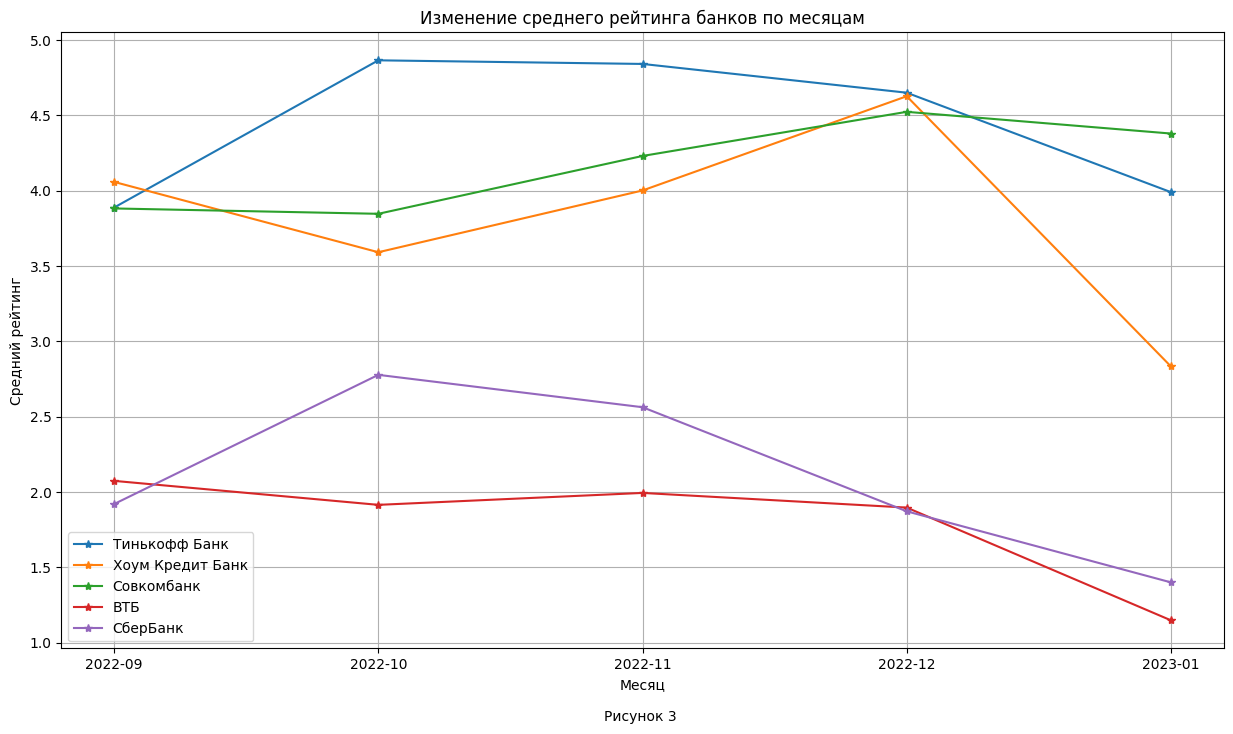

In [20]:
plt.figure(figsize=(15, 8))

for bank in top_5_bank_index:
    bank_data = top_5_banks_grouped[top_5_banks_grouped['bank_name'] == bank]
    
    plt.plot(bank_data['year_month'].astype('str'), 
             bank_data['rating'], label=bank, marker='*')

plt.title('Изменение среднего рейтинга банков по месяцам')
plt.xlabel('Месяц\n\nРисунок 3 ')
plt.ylabel('Средний рейтинг')
plt.legend()
plt.grid()

**Вывод:** В среднем у топ-5 банков заметна динамика изменения среднего рейтинга. Также большинство банков имееют спад в конце 2022 года и начале 2023. Это может свидетельствовать о том, что сотрудники банков в преддверии новогодних праздников могут быть менее продуктивными. Время обработки запросов в это время также способно увеличиваться, что может негативно сказываться на среднем рейтинге. Кроме того, большие расходы клиентов в новогодние праздники могут способствовать увеличению обращений в банки и более длительному рассмотрению каких-либо вопросов.

**4. Дополнительный EDA.**

Для дополнительного анализа создадим копию нашего датафрейма, чтобы не влиять на исходную таблицу с данными.

In [21]:
data_copy = data.copy()

Добавим дополнительные признаки для анализа

In [22]:
# Добавлние столбцов с длиной отзыва и его названия
data_copy['body_length'] = data_copy['body'].apply(len)
data_copy['title_length'] = data_copy['title'].apply(len)

Посмотрим распределение новых признаков

In [23]:
data_copy.describe()

,rating,date,body_length,title_length
count,92481.000000,92481,92481.000000,92481.000000
mean,4.062726,2022-11-11 09:45:49.135497984,652.065895,26.237973
min,1.000000,2022-09-02 00:00:00,7.000000,2.000000
25%,4.000000,2022-10-27 00:00:00,356.000000,14.000000
50%,5.000000,2022-11-08 00:00:00,441.000000,22.000000
75%,5.000000,2022-12-07 00:00:00,707.000000,34.000000
max,5.000000,2023-01-03 00:00:00,6442.000000,254.000000
std,1.621557,NaN,534.353483,16.711457


Из представленной таблицы видно, что максимальная длина отзыва и названия отзыва слишком велика. Чтобы посмотреть насколько много таких данных в нашей таблице посмотрим на распределение наших данных. 

(0.0, 15.0)

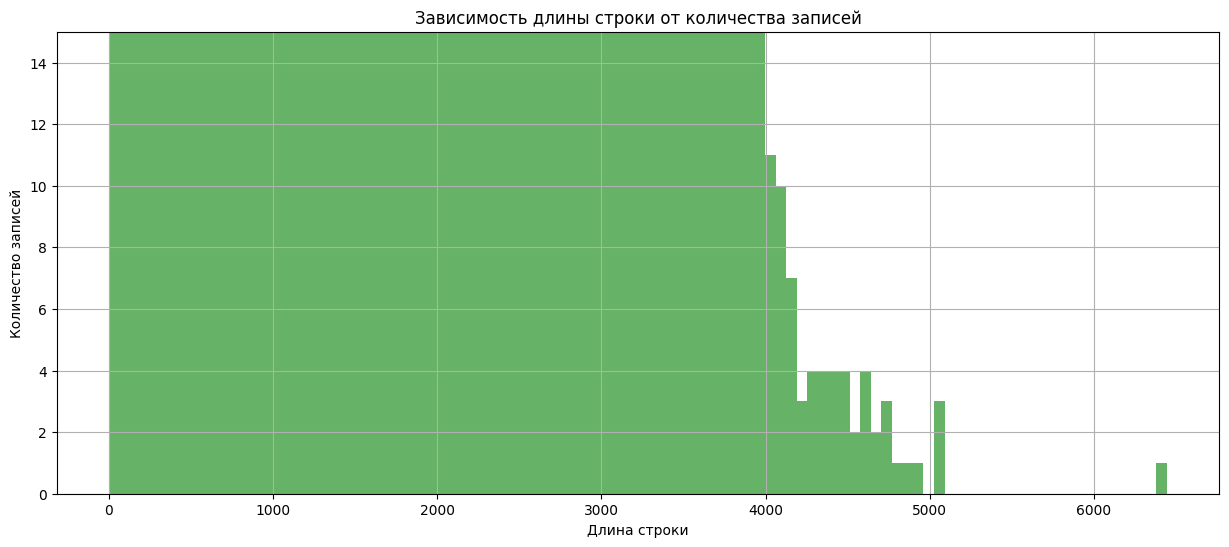

In [24]:
data_copy['body_length'].hist(figsize=(15, 6), bins=100, color='green', alpha=0.6)
plt.xlabel('Длина строки')
plt.ylabel('Количество записей')
plt.title('Зависимость длины строки от количества записей')
plt.ylim(0, 15)

Из данного графика можно заметить, что лишь несколько отзывов выделяются на фоне остальных. Давайте рассмотрим данные отзывы подробнее и узнаем причину столь большого кол-ва символов. 

In [25]:
body_length_5000 = data_copy.loc[data_copy['body_length'] > 5000]

In [26]:
for i in body_length_5000['body']:
    print(i, end='\n'*10)

&lt;p&gt;В октябре 2022 года решила воспользоваться акцией ВТБ «Переводи зарплату в ВТБ», предварительно изучив правила акции , а также правила программы лояльности, которые размещены на сайте ВТБ.&lt;/p&gt;
&lt;p&gt;По правилам акции Участнику необходимо в течение одного Отчетного периода в срок 01.10.22-31.12.22 выполнить следующие действия:&lt;/p&gt;
&lt;p&gt;1.получить Выплату не менее 10000 руб на счет Карты&lt;/p&gt;
&lt;p&gt;2.совершить Операции по Карте на общую сумму не менее 20000 руб&lt;/p&gt;
&lt;p&gt;3.совершить Операции по Карте в Категории «Супермаркеты» на любую сумму.&lt;/p&gt;
&lt;p&gt;В случае исполнения Целевых действий, банк ВТБ обязуется начислить Участнику Поощрение в размере 7,5% от суммы Операций в Категории «Супермаркеты» (не более 1500 бонусов) не позднее последнего календарного дня месяца, следующего за Отчетным периодом.&lt;/p&gt;
&lt;p&gt;Выполняя условия акции «Переводи зарплату в ВТБ»:&lt;/p&gt;
&lt;p&gt;1.Была получена Выплата 13.10.22 в размере 50822,1

Как мы видим такое количество символов вызвано наличием html разметки и послее ее удаление кол-во символов не будет выбиваться относительно остальных данных.

(0.0, 15.0)

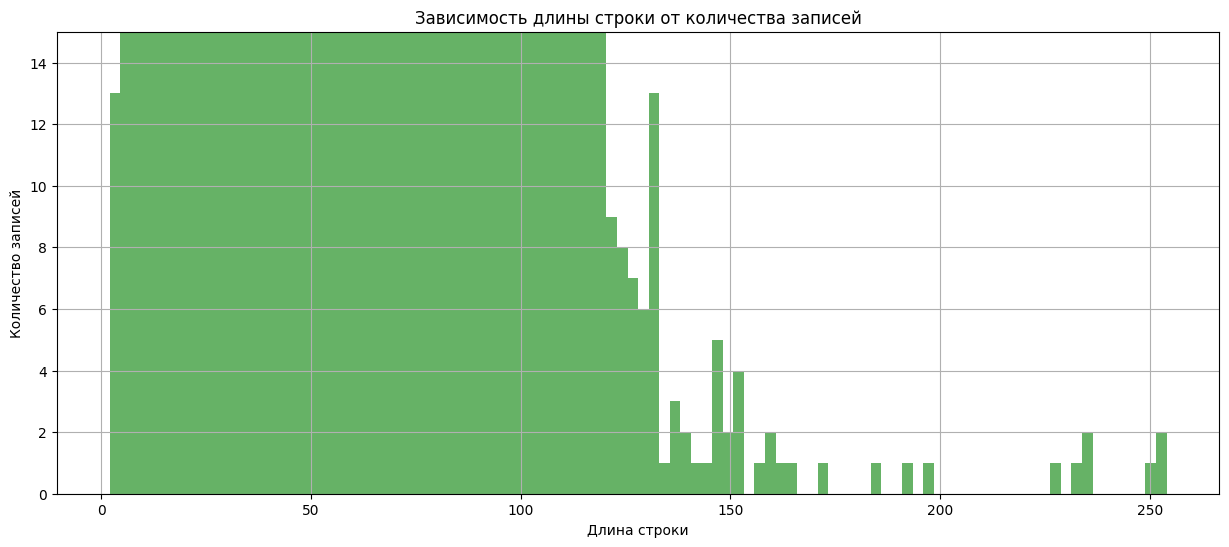

In [27]:
data_copy['title_length'].hist(figsize=(15, 6), bins=100, color='green', alpha=0.6)
plt.xlabel('Длина строки')
plt.ylabel('Количество записей')
plt.title('Зависимость длины строки от количества записей')
plt.ylim(0, 15)

В заголовке отзыва так же есть отзывы которые выбиваются из общей массы. 

In [28]:
title_length_175 = data_copy.loc[data_copy['title_length'] > 175]

In [29]:
for i in title_length_175['title']:
    print(i, end='\n'*4)

Альфа Инвестиции не дают перевести заблокированные активы другому брокеру. Дали срок на подачу заявления до 2 января, а кнопка в личном кабинете «перевод заблокированных активов» так и не появилась.



Спасибо тинкоф банк   Банк tinkoff он такой 1 в России  Хорошие люди и хорошие специалисты могут помочь в любую ситуацию в любой момент Дай Бог вам здоровья тем который работает в tinkoff банк



С 29.12.22г. деньги клиента  зависли в ПАО «МТС-Банк» (ИНН 7702045051), т.к. платёж не прошёл через СПБ, а сотовый оператор ПАО «МТС» (ИНН 7740000076) перекрыл доступ в банк. приложение. Клиент лишился денег  на сумму 2540 руб. 35 коп..



Альфа Инвестиции отказываются перевести заблокированные активы другому брокеру. Дали срок на подачу заявления до 2 января, а кнопка в личном кабинете «перевод заблокированных активов» так и не появилась. В отделении помочь отказываются.



ООО «Международный Транспортный Сервис» благодарит и выражает глубокую признательность сотруднику Дополнительного офиса № 

Исходя из вывода можно утверждать, что длинные заголовки так же имеют место быть и ничего аномального в них нет.

Так же стоит обратить внимание на один из заголовков никак не связаным с отзывами на банк.

Посмотрим на него подробнее.

In [30]:
title_length_175.iloc[6]

body            250Далеко-далеко за словесными горами в стране...
title           250Далеко-далеко за словесными горами в стране...
rating                                                          5
bank_name                                          Агропромкредит
date                                          2022-12-27 00:00:00
body_length                                                   304
title_length                                                  250
Name: 3162, dtype: object

In [31]:
title_length_175.iloc[6]['body']

'250Далеко-далеко за словесными горами в стране гласных и согласных живут рыбные тексты. Вдали от всех живут они в буквенных домах на берегу Семантика большого языкового океана. Маленький ручеек Даль журчит по всей стране и обеспечивает ее всеми необх о оишишишишишиштштштщтщидтщтщтщтщтщтщтщотзтоизоиззоиг'

Исходя из текста данного отзыва можно предположить, что он никак не относится к отзывам на банки и возможно сделан каким-то человеком намерено с целью повысить средний рейтинг банка "Агропромкредит" или же и вовсе ботом. Так же стоит отметить, что при обучении модели данный отзыв не нужен и поэтому было принято решение удалить его из общего набора данных. 

In [32]:
data.drop(index=3162)
data

,body,title,rating,bank_name,date
0,&lt;p&gt;Добрый день&lt;/p&gt;\r\n&lt;p&gt;пиш...,Заблокировали средства,1,Еком Банк,2023-01-03
1,&lt;p&gt;При возврате просроченной задолженнос...,Возврат просроченной задолженномти,1,Тинькофф Банк,2023-01-03
2,&lt;p&gt;07.09.22 ю была оформлена кредитная к...,"Ошибочное начисление комиссии, затягивание про...",1,Банк Открытие,2023-01-03
3,&lt;p&gt;Новый год начинается с приятностей)&l...,Клиентоориентиванность 10 из 10,5,Тинькофф Банк,2023-01-03
4,&lt;p&gt;Увидела на сайте Газпромбанка акцию с...,Как Газпромбанк обманывает клиентов с акционны...,1,Газпромбанк,2023-01-03
...,...,...,...,...,...
92730,"30 августа обнаружила, что баланс уменьшился. ...",Банк списал деньги и теперь рекомендует их сам...,1,Совкомбанк,2022-09-02
92731,Обратился с вопросом (6908609) по All Airlines...,Отличная консультация от сотрудника поддержки,5,Тинькофф Банк,2022-09-02
92732,В августе 2021 я досрочно погасил ипотеку (кре...,Снятие обременения с квартиры,2,Россельхозбанк,2022-09-02
92733,9.08.22 оформлен кредит на покупку автомобиля ...,Штрафные санкции,1,Драйв Клик Банк,2022-09-02


**Вывод:** Из результатов анализа следует, что медианное значение длины отзывов и заголовко составляет 441 и 22 слова соответственно, что можно считать стандартным показателем. Также следует отметить, что среднее значение длины не сильно отличается от медианного и составляет 534 слова для отзывов и 26 слов для заголовков.

**5. Нет ли в данных в целом каких-то странностей?** 

Анализируя проведенный EDA, можно отметить, что некоторые отзывы содержат HTML-разметку, в то время как другие не имеют такого форматирования. Это, вероятно, связано с изменениями в форме заполнения отзывов, хранением данных на сервере или изменениями в методе парсинга данных в определенный момент времени. 

Также следует отметить, что в данных присутствуют аномальные отзывы, как, например, в строке номер 3162, который, вероятно, может быть сгенерирован с использованием бота. 

Наблюдаемые всплески на графике зависимости количества дубликатов от даты и общего количества дубликатов могут свидетельствовать о намеренном увеличении средней оценки банками в определенные периоды времени.

**Вывод по пункту 3.** В ходе выполнения данного пункта мы провели EDA и оветили на поставленные вопросы. 

**1. Назвать топ-15 банков по числу отзывов.** Тинькофф Банк, Хоум Кредит Банк, Совкомбанк, ВТБ, СберБанк, Альфа-Банк, Россельхозбанк, Банк Открытие, МТС Банк, Модульбанк, Газпромбанк, Московский Кредитный Банк, Азиатско-Тихоокеанский Банк, Уральский Банк Реконструкции и Развития, Русский Стандарт. 


**2. Какой банк из числа топ-15 по количеству отзывов имеет самый высокий средний рейтинг?** Тинькофф Банк


**3. Сделать выводы об изменении среднего рейтинга банков по месяцам из топ-5 банков по числу отзывов.**  В среднем у топ-5 банков заметна динамика изменения среднего рейтинга. Также большинство банков имееют спад в конце 2022 года и начале 2023. Это может свидетельствовать о том, что сотрудники банков в преддверии новогодних праздников могут быть менее продуктивными. Время обработки запросов в это время также способно увеличиваться, что может негативно сказываться на среднем рейтинге. Кроме того, большие расходы клиентов в новогодние праздники могут способствовать увеличению обращений в банки и более длительному рассмотрению каких-либо вопросов. 


**4. Дополнительный EDA.** Из результатов анализа следует, что медианное значение длины отзывов и заголовко составляет 441 и 22 слова соответственно, что можно считать стандартным показателем. Также следует отметить, что среднее значение длины не сильно отличается от медианного и составляет 534 слова для отзывов и 26 слов для заголовков.


**5. Нет ли в данных в целом каких-то странностей?** Анализируя проведенный EDA, можно отметить, что некоторые отзывы содержат HTML-разметку, в то время как другие не имеют такого форматирования. Это, вероятно, связано с изменениями в форме заполнения отзывов, хранением данных на сервере или изменениями в методе парсинга данных в определенный момент времени. 

Также следует отметить, что в данных присутствуют аномальные отзывы, как, например, в строке номер 3162, который, вероятно, может быть сгенерирован с использованием бота. 

Наблюдаемые всплески на графике зависимости количества дубликатов от даты и общего количества дубликатов могут свидетельствовать о намеренном увеличении средней оценки банками в определенные периоды времени.

## Подготовка данных для обучения и выбор метрики

В ходе выполнения данного пункта мы подготовим данные в корректный вид, чтобы модель могла их понимать. 

В ходе этого этапа будет произведана очистка текста от html разметки и лишних символов, избавление от стоп-слов, токенизация, лемматизация.

Также будут удалены неинформативные признаки и выбрана метрика для обучения модели.

In [33]:
data.head()

,body,title,rating,bank_name,date
0,&lt;p&gt;Добрый день&lt;/p&gt;\r\n&lt;p&gt;пиш...,Заблокировали средства,1,Еком Банк,2023-01-03
1,&lt;p&gt;При возврате просроченной задолженнос...,Возврат просроченной задолженномти,1,Тинькофф Банк,2023-01-03
2,&lt;p&gt;07.09.22 ю была оформлена кредитная к...,"Ошибочное начисление комиссии, затягивание про...",1,Банк Открытие,2023-01-03
3,&lt;p&gt;Новый год начинается с приятностей)&l...,Клиентоориентиванность 10 из 10,5,Тинькофф Банк,2023-01-03
4,&lt;p&gt;Увидела на сайте Газпромбанка акцию с...,Как Газпромбанк обманывает клиентов с акционны...,1,Газпромбанк,2023-01-03


Для начала отчистим наш текст `body` от лишних символов и стоп слов, произведем токенизацию текста и дальнейшую лемматизацию каждого отдельного токена.

In [34]:
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('russian'))
morph = pymorphy2.MorphAnalyzer()


def clean_text(text):
    """
    Функция для удаления из текста html разметки и лишних символов
    param text: текст для очистки
    type text: pd.Series 
    """
    text = unescape(text)
    clean_text = re.sub(r'[^а-яА-Я\s0-9.,:/-]', '', text)
    clean_text = re.sub(r'<.*?>', '', text)
    clean_text = clean_text.lower()
    clean_text = re.sub(r'[\r\n\t]', ' ', clean_text)
    clean_text = re.sub(r'\s+', ' ', clean_text).strip()
    return clean_text

def tokenize_and_remove_stopwords(text):
    """
    Функция для токенезации текста и удаления стоп-слов
    param text: текст для токенизации
    type text: pd.Series 
    """
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

def lemmatize_text(tokens):
    """
    Функция для лемматизации текста
    param text: список токенов для лемматизации
    type text: pd.Series(list()) 
    """
    lemmatized_tokens = [morph.parse(token)[0].normal_form for token in tokens]
    return lemmatized_tokens

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
# Очистка текста от лишних символов
data['text_body'] = data['body'].progress_apply(clean_text)

  0%|          | 0/92481 [00:00<?, ?it/s]

In [36]:
# Токенизация и удаление стоп-слов
data['text_body'] = data['text_body'].progress_apply(tokenize_and_remove_stopwords)

  0%|          | 0/92481 [00:00<?, ?it/s]

In [37]:
# Лемматизация текста
data['text_body'] = data['text_body'].progress_apply(lemmatize_text)

  0%|          | 0/92481 [00:00<?, ?it/s]

Также для дальнейшей векторизации текста мы соеденими лемматизированные токены обратно в полноценный текст.

In [38]:
# Объединение обработанных токенов в текст
data['text_body'] = data['text_body'].progress_apply(lambda tokens: ' '.join(tokens))

  0%|          | 0/92481 [00:00<?, ?it/s]

In [39]:
data.head()

,body,title,rating,bank_name,date,text_body
0,&lt;p&gt;Добрый день&lt;/p&gt;\r\n&lt;p&gt;пиш...,Заблокировали средства,1,Еком Банк,2023-01-03,добрый день писать сюда скорый разрешение вопр...
1,&lt;p&gt;При возврате просроченной задолженнос...,Возврат просроченной задолженномти,1,Тинькофф Банк,2023-01-03,"возврат просрочить задолженность , банк звонит..."
2,&lt;p&gt;07.09.22 ю была оформлена кредитная к...,"Ошибочное начисление комиссии, затягивание про...",1,Банк Открытие,2023-01-03,07.09.22 ю оформить кредитный карта `` 120 ден...
3,&lt;p&gt;Новый год начинается с приятностей)&l...,Клиентоориентиванность 10 из 10,5,Тинькофф Банк,2023-01-03,новый год начинаться приятность ) понимать чел...
4,&lt;p&gt;Увидела на сайте Газпромбанка акцию с...,Как Газпромбанк обманывает клиентов с акционны...,1,Газпромбанк,2023-01-03,увидеть сайт газпромбанк акция бонус кредитный...


После очистки нашего текста необходимо создать целевой признак по условию. Где отзыв считается положительным если значение `rating` >= 3 и отрицательным если значение `rating` < 3.

In [40]:
data['label'] = (data['rating'] >= 3).astype(int)

Поскольку наш классификатор будет обучени различать текст отзыва и на основе него принимать решение о принадлежности к определенному классу, мы решаем удалить все остальные столбца из нашей таблицы. Столбцы `bank_name` и `date` лишены смысловой нагрузки для модели. Поле `rating` было исключено, так как на его основе была создана целевая переменная, и при обучении модели решение вероятно будет сильно зависеть от значения данного столбца, что не является оптимальным для задачи классификации отзывов. Столбец `title` был также удален, поскольку, как правило, это поле несет тот же смысл, что и наш преобразованный текст, и может привести к избыточным признакам, усложнению модели и увеличению вычислительных затрат.

In [41]:
# Создадим копию наших данных перед удалением столбцов
data_before = data.copy()
data = data.drop(['body', 'title', 'rating', 'bank_name', 'date'], axis=1)

In [42]:
data.head()

,text_body,label
0,добрый день писать сюда скорый разрешение вопр...,0
1,"возврат просрочить задолженность , банк звонит...",0
2,07.09.22 ю оформить кредитный карта `` 120 ден...,0
3,новый год начинаться приятность ) понимать чел...,1
4,увидеть сайт газпромбанк акция бонус кредитный...,0


Посмтроим баланс классов.

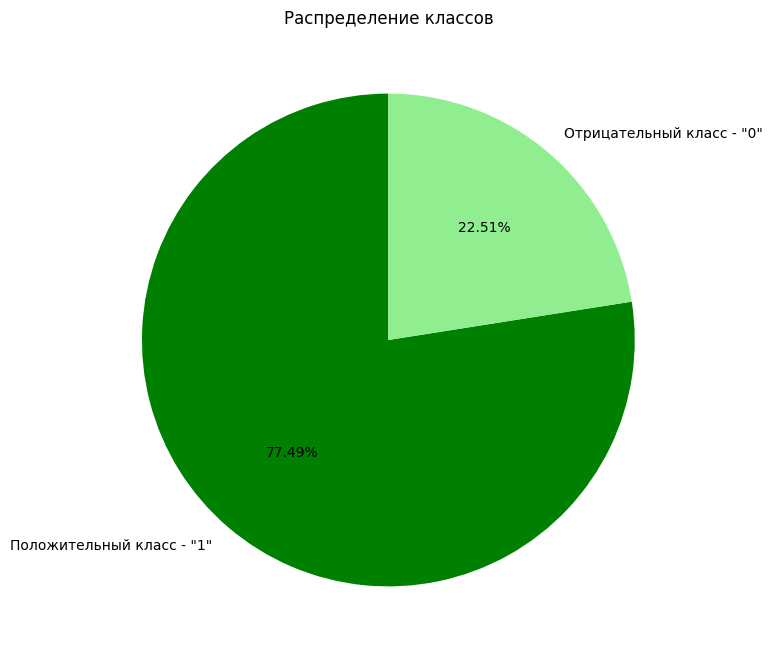

In [43]:
value_counts = data['label'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(value_counts, 
        labels=['Положительный класс - "1"', 'Отрицательный класс - "0"'], 
        autopct='%1.2f%%', startangle=90, 
        colors=['green','lightgreen'],)
plt.title('Распределение классов');

**Выбор метрики:** Учитывая дисбаланс классов, где положительных классов (77,49%) значительно больше, чем отрицательных (22,51%), мы решаем использовать метрику F1. Эта метрика учитывает дисбаланс классов, в отличии, например, от метрики ROC-AUC, которая может давать завышенные результаты при дисбалансе классов.

**Вывод:** В ходе выполнения данного пункта нами были предобработаны признаки для обучения модели. А именно: 
1. Текст был отчищен от лишних символов
2. Текст был отчищен от стоп-слов и токенизирован
3. Текст прошел лемматизацию каждого отдельного токена
4. Текст был объеденен обратно 

Также были убраны все неинформативные признаки и оставлены только отзывы.  Была создана целевая переменная `label`, изучен дисбаланс классов и выбрана метрика F1, поскольку она является наиболее устойчивой к дисбалансу классов. 

## Обучение модели

### Обучение алгоритма опорных векторов (SVM)

Одним из часто используемых алгоритмов классификации является алгоритм SVM. Для его реализации воспользуемся уже готовым алгоритмом из библиотеки ***scikit-learn***. 

In [44]:
# Разделение на выборки
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [45]:
%%time

# Инициализация pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=1000)),
    ('svc', SVC())
])


pipeline.fit(train_data['text_body'], train_data['label'])


predictions = pipeline.predict(test_data['text_body'])

# Нахождение F1-score
f1 = f1_score(test_data['label'], predictions)
report = classification_report(test_data['label'], predictions)

print(f'F1-Score на отложенной выборке: {f1}')
print('Report:\n', report)

F1-Score на отложенной выборке: 0.9817938984957121
Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      4215
           1       0.99      0.98      0.98     14282

    accuracy                           0.97     18497
   macro avg       0.96      0.96      0.96     18497
weighted avg       0.97      0.97      0.97     18497

Wall time: 21min 15s


Построим матрицу ошибок нашего классификатора

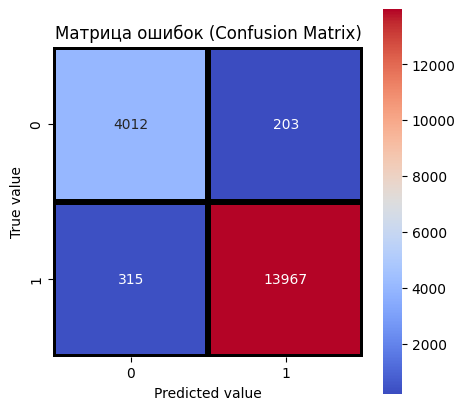

In [46]:
# Построение матрицы ошибок
conf_matrix_svm = confusion_matrix(test_data['label'], predictions)
plt.figure(figsize=(5, 5))
sns.heatmap(
    conf_matrix_svm, annot=True, 
    fmt='d', cmap='coolwarm',
    linewidths=3,
    linecolor='black',
    square=True
)
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.title('Матрица ошибок (Confusion Matrix)');

In [47]:
data_negativ_count = test_data[test_data['label'] == False].shape[0]
predict_negativ_count = conf_matrix_svm[0][0]


negative_predict_percent = '{:.2f}%'.format(predict_negativ_count / data_negativ_count * 100)
print(f'Процент правильно предсказанных негативных отзывов - {negative_predict_percent}')

Процент правильно предсказанных негативных отзывов - 95.18%


Как мы видим recall нашей модели равняется 95 %, что является довольно хорошим показателем.

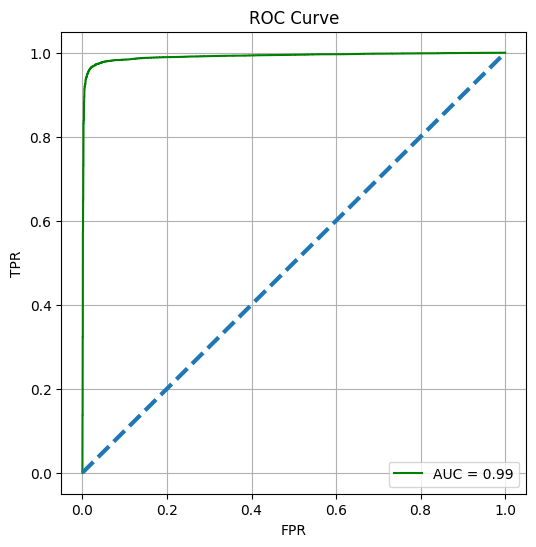

In [48]:
# Вероятности для построения roc-curve
probas = pipeline.decision_function(test_data['text_body'])

fpr, tpr, thresholds = roc_curve(test_data['label'], probas)
roc_auc = roc_auc_score(test_data['label'], probas)

# Построение ROC-кривой
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='green',label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], lw=3, linestyle='dashed')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right');
plt.grid();

**Вывод по результатам предсказания алгоритма SVM:** Метрика F1 для модели SVM в нашем эксперименте равна 0.982. Из полученной в резульате эксперимента матрицы ошибок видно, что модель правильно классифицирует 4012 (95,18%) негативных отзывов.

Для более качественной классификации можно воспользоваться методами подбора гиперпараметров, которые предоставляет библиотека **scikit-learn**, например, GridSearchCV или RandomizedSearchCV. Такой подход может увеличить метрику и процент правильно классифицированных негативных отзывов (True Negative)

### Нейросетевой подход

Для реализации данной задачи можно построить простую нейронную сеть представляющую собой многослойный персептрон. В нашем случае перспетрон будет содержать четыре полносвязных слоя и функцию активации ReLU после каждого из них. На выходе нашей модели будет использоваться функция активации Segmoid. В результате работы модели мы получим вероятности классов для каждого объекта в нашем датасете, и регулируя порог `treshold` получим итоговый класс (в первом эксперименте установим `treshold = 0.5`)

In [49]:
%%time

# Преобразование текстов в мешок слов
max_features = 5000 # Может варироваться в зависимости от вичислительной мощности
vectorizer = CountVectorizer(max_features=max_features)
X_train = vectorizer.fit_transform(train_data['text_body'])
X_test = vectorizer.transform(test_data['text_body'])


class TextDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.toarray(), dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = TextDataset(X_train, train_data['label'])
test_dataset = TextDataset(X_test, test_data['label'])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Архитектура нейросетевого алгоритма
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size // 2)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size // 2, hidden_size // 4)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size // 4, hidden_size // 8)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size // 8, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

# Инициализация модели, лосс-функции, оптимизатора
model = MLP(input_size=X_train.shape[1], hidden_size=2048, output_size=1)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Обучение модели
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer.step()

# Проверка модели на отложенной выборке
model.eval()
with torch.no_grad():
    predictions = []
    true_labels = []
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predictions.extend(outputs.numpy())
        true_labels.extend(labels.numpy())

# Вычисление F1-score
threshold = 0.5
binary_prediction_50 = [1 if pred > threshold else 0 for pred in predictions]
f1 = f1_score(true_labels, binary_prediction_50)

print(f'F1-score на отложенной выборке: {f1}')

F1-score на отложенной выборке: 0.9813034752297455
Wall time: 10min 14s


Text(0.5, 1.0, 'Матрица ошибок (Confusion Matrix)')

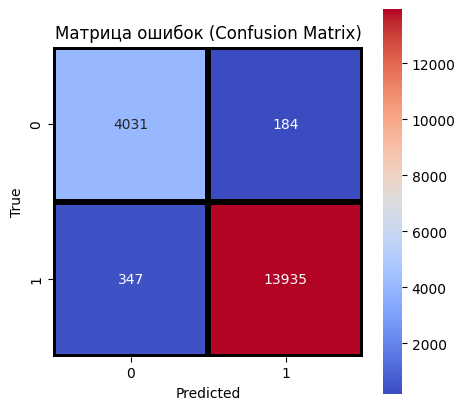

In [50]:
# Построение матрицы ошибок
plt.figure(figsize=(5, 5))
conf_matrix_nn = confusion_matrix(true_labels, binary_prediction_50)
sns.heatmap(
    conf_matrix_nn, annot=True, 
    linecolor='black', cmap='coolwarm', 
    linewidths=3, square=True, fmt='d'
)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Матрица ошибок (Confusion Matrix)')

In [51]:
predict_negativ_count = conf_matrix_nn[0][0]

negative_predict_percent = '{:.2f}%'.format(predict_negativ_count / data_negativ_count * 100)
print(f'Процент правильно предсказанных негативных отзывов - {negative_predict_percent}')

Процент правильно предсказанных негативных отзывов - 95.63%


Нейросетевой подход с реализацией многослойного персептрона при использовании фреймворка PyTorch продемонстрировал значение метрики F1 ниже (F1 = 0.98), чем решение с использованием метода опорных векторов (SVM). Однако стоит отметить, что при таком же значении порога (`treshold = 0.5`) удалось достигнуть больше правильно классифицированных негативных отзывов, равное 4056 (~96%) отзывам.

Примечательно, что данная реализация обладает гибкостью, позволяющей вручную настраивать порог `treshold` в соответствии с требованиями заказчика. Если задаче является поиск макисмального числа негативных отзывов, мы можем увеличить установленный порог, например, до 0.85, что немного улучшит значение Recall.

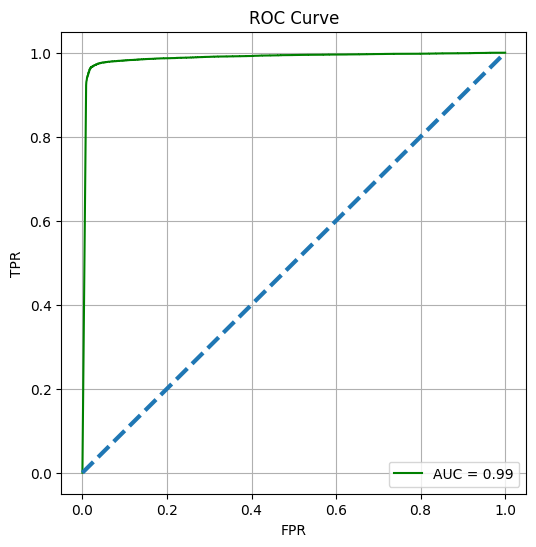

In [52]:
fpr, tpr, thresholds = roc_curve(true_labels, predictions)
roc_auc = roc_auc_score(true_labels, predictions)

# Построение ROC-кривой
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='green',label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], lw=3, linestyle='dashed')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid();

Мы можем изменить значение `treshold`, устанавливая более строгие требования к предсказанию положительного класса и увеличив количество предсказанных негативных классов, включая и величины TN, и величины FN. Увеличение TN является положительным аспектом, однако увеличение FN может вызвать необходимость дополнительной проверки положительных комментариев, классифицированных как отрицательные. В данном случае FN также приводит к пропуску меньшего количества отрицательных комментариев. Установим `treshold = 0.85` и проверим резульаты работы модели.

In [53]:
threshold = 0.85
binary_prediction_85 = [1 if pred > threshold else 0 for pred in predictions]
f1 = f1_score(true_labels, binary_prediction_85)
print(f'F1-score на отложенной выборке: {f1}')

F1-score на отложенной выборке: 0.9811467306877559


Text(0.5, 1.0, 'Матрица ошибок (Confusion Matrix)')

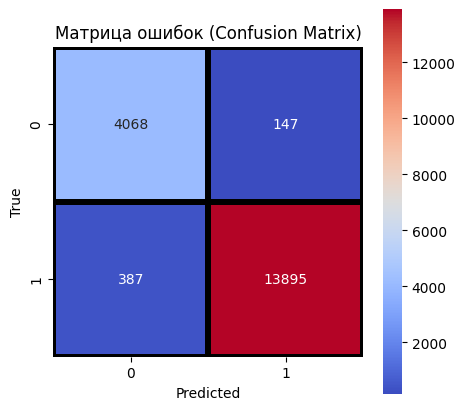

In [54]:
# Построение матрицы ошибок
plt.figure(figsize=(5, 5))
conf_matrix_nn2 = confusion_matrix(true_labels, binary_prediction_85)
sns.heatmap(
    conf_matrix_nn2, annot=True, 
    linecolor='black', cmap='coolwarm', 
    linewidths=3, square=True, fmt='d'
)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Матрица ошибок (Confusion Matrix)')

In [55]:
predict_negativ_count = conf_matrix_nn2[0][0]

negative_predict_percent = '{:.2f}%'.format(predict_negativ_count / data_negativ_count * 100)
print(f'Процент правильно предсказанных негативных отзывов - {negative_predict_percent}')

Процент правильно предсказанных негативных отзывов - 96.51%


В результате увеличения порога значение метрики F1 уменьшилось до 0.979 единиц, но при этом нам удалось достигнуть 4098 (~97%) правильно классифицированных негативных отзывов, что не смотря на уменьшение метрики является отличным результатом.

Важно отметить, что при таком подходе мы увеличили кол-во неправильно классифицированных негативных отзывов на 73.

**Вывод по работе нейросетевого алгоритма:** В результате реализации многослойного персептрона нам удалось добиться метрики F1 ~ 0.98. При этом процент правильно классифицированных отзывов стал на ~2% (при `treshold = 0.85`) больше по сравнению с решением методом опорных векторов. 

Сохраним готовую модель в файл.

In [56]:
model_path = 'pytroch_model.pth'

torch.save(model.state_dict(), model_path)

print(f'Model saved at: {model_path}')

Model saved at: pytroch_model.pth


In [57]:
model.load_state_dict(torch.load('pytroch_model.pth'))
print(summary(model, input_size=(X_train.shape[1],)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1024]       5,121,024
              ReLU-2                 [-1, 1024]               0
            Linear-3                  [-1, 512]         524,800
              ReLU-4                  [-1, 512]               0
            Linear-5                  [-1, 256]         131,328
              ReLU-6                  [-1, 256]               0
            Linear-7                    [-1, 1]             257
           Sigmoid-8                    [-1, 1]               0
Total params: 5,777,409
Trainable params: 5,777,409
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 0.03
Params size (MB): 22.04
Estimated Total Size (MB): 22.09
----------------------------------------------------------------
None


**Вывод по пункту 5:** В ходе выполнения данного пункта нами были реализованы два подхода: ***нейросетевой*** и ***метод опорных векторов***. Опишем плюсы и минусы каждого из них.

**Метод опорных векторов (SVM).** 

С помощью данной реализации нам удалось достичь метрики F1 равной 0.981 и 95% правильно классифицированных отзывов.



**Достоинства:**


1. Требует меньше вычислительных ресурсов
2. Более интерпретируемый
3. Простота реализации


**Недостатки:**


1. Скорость работы модели
2. Данный подход менее приспособлен для использования в продакшен в отличии от реализации на PyTorch
3. При увеличении объема выборки скорость работы данного метода слишком сильно увеличивается.
4. Ограниченные возможности гибкого подбора порога `treshold`, так как на выходе получается конкретный класс.

**Нейросетевой подход (многослойный персептрон).**

С помощью данной реализации нам удалось достичь метрики F1 ~ 0.98 и 97% правильно классифицированных отзывов (при `treshold = 0.85`).

**Достоинства:**

1. Способность обрабатывать большие объемы данных
2. Скорость работы 
3. Возможность использования в продакшене
4. Возможность более гибко настраивать порог `treshold`, так как на выходе модели мы получаем вероятности классов


**Недостатки:**

1. Сложность реализации
2. Сложность интерпретации работы модели и ответа на вопрос почему именно этот класс был выбран моделью
3. При увеличении количества признаков может потребоваться работа с графическим процессором (GPU)

## Отчет о проделанной работе

### Этапы выполнения

В ходе выполнения работы мы проделали следующие шаги.


**1. Загрузили и изучили данные.** В наших данных имелось 92735 строки и 5 столбцов.

**2. Предобработали данные.** В результате выполнения данного этапа был изменени тип данных в поле `date`, убедились в отсутствии пропусков и аномалий. Обнаружено 254 дубликата и проведен анализ причин их возникновения. Найденые дубликаты были удалены.

**3. Проделали EDA.** Мы выполнили более детальный анализ данных и ответили на поставленные вопросы. Была удалена еще одна строка с номером 3162.


**4. Подготовка данных для обучения.** Полученные отзывы были отчищены от лишних символов и html разметки. Проведена токенизация текста и лемматизация получившихся токенов. В результате выполнения пункта мы получили лемматизированные и отчищенные текста отзывов, которые можно использовать для обучения модели. Выбрана метрика F1.


**5. Обучение модели.** Были рассмотрены два подхода (SVM и MLP). Как наиболее подходящие решение было выбрано использование модели PyTorch с метрикой F1 ~ 0.98 и выбранным `treshold = 0.85`. Данная модель была обучена, протестирована на отложенной выборке и загружена в файл `pytorch_model.pth`.

### Анализ признаков

Для повышения качества классификации отзывов можно расммотреть следующие улучшения на этапе сбора данных. Добавление этапа по поиску и исключению искусственно сгенерированных отзывов, направленных на увеличение средней оценки, может значительно улучшить обучение, так как такие данные могут негативно сказаться на ее эффективности.

Также можно рассмотреть вариант изменения подхода при создании целевой переменной. Пятибальная система не всегда отражает объективную оценку человека. Например, оценка "3" не всегда соответствует положительному отзыву.

### Использование модели

Для более эффективного использования модели рекомендуется увеличть объем данных для обучения. Это позволит модели лучше улавливать контекст отзывов и выявлять более глубоки взаимосвязи, что сделает ее более точной в задачи классификации.

В контексте использования модели для улучшения сервисов банка, можно рассмотреть возможность перехода к задаче регрессии. Можно предсказывать вероятности классов и рассматривать отзывы начиная с выосокой вероятности (~90%), и постепенно опускаясь изучать отзывы с вероятностью 70-80 % и так далее.

Применение SHAP features importance также может быть полезным. Эта техника позволит более точно оценить, какие признаки оказывают влияние на прогнозы модели.

Также с помощью данного подхода можно не только решать задачу классификации отзывов, но и адаптировать ее для многоклассовой классификации. Например, более точно определять в аспектах клиент выразил недовольство (онлайн услуги, консультации, кредитные услуги и т.д.)